29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6357 - loss: 1.1393 - val_accuracy: 0.8084 - val_loss: 0.5746
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8175 - loss: 0.5412 - val_accuracy: 0.8282 - val_loss: 0.5022
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8277 - loss: 0.4997 - val_accuracy: 0.8478 - val_loss: 0.4574
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8431 - loss: 0.4541 - val_accuracy: 0.8494 - val_loss: 0.4446
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8461 - loss: 0.4420 - val_accuracy: 0.8604 - val_loss: 0.4237
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8505 - loss: 0.4300 - val_accuracy: 0.8566 - val_loss: 0.4245
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8551 - loss: 0.4146 - val_accuracy: 0.8624 - val_loss: 0.4102
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8576 - loss: 0.4057 

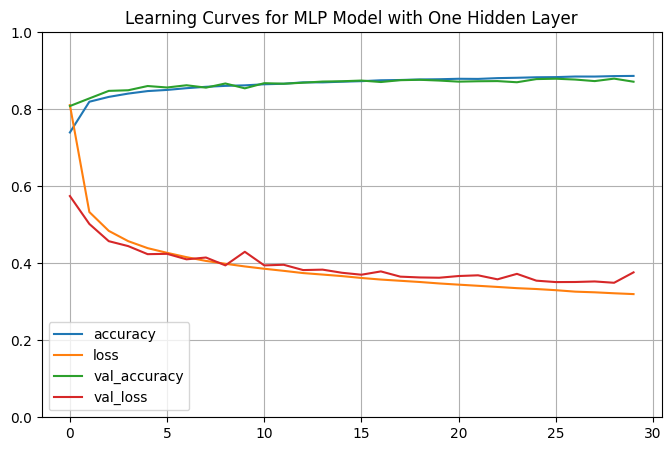

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.3411
Training accuracy: 0.8788
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.3976
Test accuracy: 0.8557
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Detailed training set accuracy: 0.8788
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Detailed test set accuracy: 0.8557


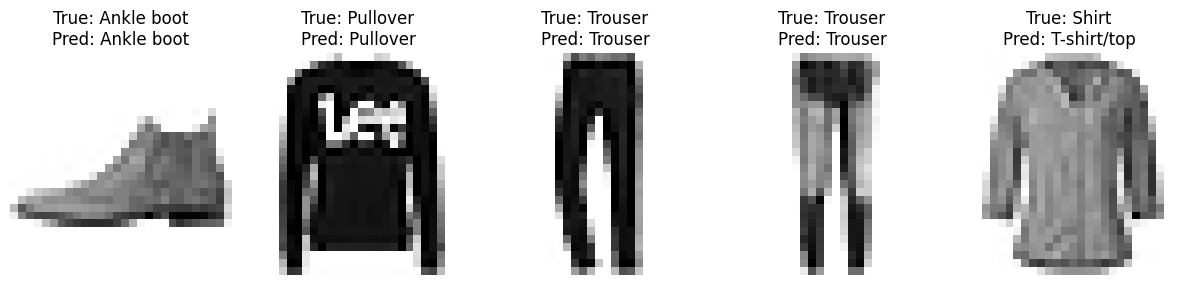


Comparison of Model Performance:
--------------------------------------------------
Model                Training Accuracy    Test Accuracy       
--------------------------------------------------
Perceptron           0.8788               0.8557


In [1]:
# ==================================================================================

# Fashion MNIST classification using MLP with one hidden layer

# --- Using the same dataset from Question 1 ---

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Skip dataset loading if already done in Question 1
# Otherwise, uncomment these lines:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# --- Creating the MLP model with one hidden layer using the Sequential API ---

mlp_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(50, activation="relu"),  # One hidden layer with 50 neurons
    keras.layers.Dense(10, activation="softmax")
])

# --- Display model information ---

mlp_model.summary()

# --- Compiling the model ---

mlp_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="sgd",
                 metrics=["accuracy"])

# --- Training and evaluating the model ---

history = mlp_model.fit(X_train, y_train, epochs=30,
                       validation_data=(X_valid, y_valid))

# --- Learning curves ---

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("Learning Curves for MLP Model with One Hidden Layer")
plt.show()

# --- Model evaluation on training set ---

train_loss, train_accuracy = mlp_model.evaluate(X_train, y_train)
print(f"Training accuracy: {train_accuracy:.4f}")

# --- Model evaluation on test set ---

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# --- Using the model to make predictions ---

y_train_proba = mlp_model.predict(X_train)
y_train_pred = np.argmax(y_train_proba, axis=1)
print(f"Detailed training set accuracy: {accuracy_score(y_train, y_train_pred):.4f}")

y_test_proba = mlp_model.predict(X_test)
y_test_pred = np.argmax(y_test_proba, axis=1)
print(f"Detailed test set accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# --- Display some predictions ---

n_images = 5
plt.figure(figsize=(12, 4))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="binary")
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_test_pred[i]]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# --- Comparison between Perceptron and MLP ---

print("\nComparison of Model Performance:")
print("-" * 50)
print(f"{'Model':<20} {'Training Accuracy':<20} {'Test Accuracy':<20}")
print("-" * 50)
print(f"{'Perceptron':<20} {train_accuracy:.4f}{'':<14} {test_accuracy:.4f}")

# If you have the perceptron results from Question 1, you can use them directly:
# print(f"{'Perceptron':<20} {perceptron_train_accuracy:.4f}{'':<14} {perceptron_test_accuracy:.4f}")